In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import re
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from nltk.stem.snowball import SnowballStemmer
import warnings
warnings.filterwarnings('ignore')
import pandas_profiling as pp
import seaborn as sns
import matplotlib as plt
%matplotlib inline

# Load the dataset

In [3]:
#load the full set of the data
blog_df = pd.read_csv("/content/drive/MyDrive/GL/Stats_NLP/blogtext.csv", nrows= 10000)


In [4]:
# check the shape of the data frame by using the shape attribute of the data frame
blog_df.shape

(10000, 7)

In [5]:
#check if the data frame is properly loaded using the sample() method
blog_df.sample(5)

,id,gender,age,topic,sign,date,text
9473,2102033,male,16,indUnk,Cancer,"16,May,2004",under construction cuz im in comp with ...
1223,2559416,female,15,Student,Aquarius,"17,January,2004",'I walk down the face of this Ear...
2761,589736,male,35,Technology,Aries,"05,August,2004",i'm not sure if that's going to wor...
3742,3835942,male,25,indUnk,Taurus,"04,July,2004",Last weekend was a memorable one fo...
7547,883178,male,36,Fashion,Aries,"24,November,2003",Reflections on My Misspent Youth ...


In [6]:
blog_df.head()

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,..."
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewe...
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...
3,2059027,male,15,Student,Leo,"12,May,2004",testing!!! testing!!!
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...


In [7]:
#check if the last 5 rows of the data frame using the tail() method
blog_df.tail()

,id,gender,age,topic,sign,date,text
9995,1705136,female,25,indUnk,Pisces,"19,May,2004",take me home with you forever where I ...
9996,1705136,female,25,indUnk,Pisces,"23,June,2004",seductive secretness behind doors warn...
9997,1705136,female,25,indUnk,Pisces,"21,June,2004",For being so kind to me when I need yo...
9998,1705136,female,25,indUnk,Pisces,"09,June,2004",blurry outside sounds as people mingle...
9999,1705136,female,25,indUnk,Pisces,"07,June,2004",my body feels broken while my mind rej...


In [8]:
#check the feature/columns  using the info method
blog_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      10000 non-null  int64 
 1   gender  10000 non-null  object
 2   age     10000 non-null  int64 
 3   topic   10000 non-null  object
 4   sign    10000 non-null  object
 5   date    10000 non-null  object
 6   text    10000 non-null  object
dtypes: int64(2), object(5)
memory usage: 547.0+ KB


In [9]:
blog_df.gender.value_counts()

male      5916
female    4084
Name: gender, dtype: int64

# EDA with Pandas Profiler

In [10]:
#chceck for na values
blog_df.isna().sum()

id        0
gender    0
age       0
topic     0
sign      0
date      0
text      0
dtype: int64

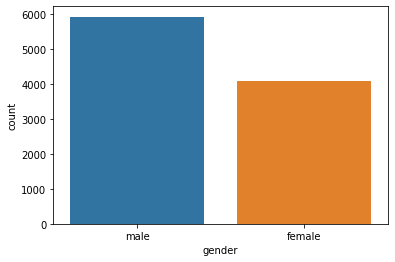

In [11]:
sns.countplot(x='gender',data=blog_df)

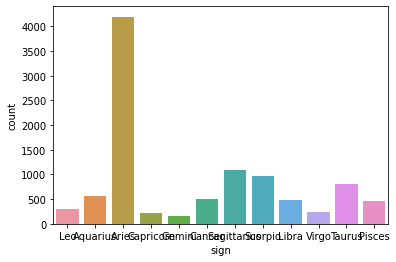

In [12]:
sns.countplot(x='sign',data=blog_df)

In [13]:
#chceck for null values
blog_df.isnull().sum()

id        0
gender    0
age       0
topic     0
sign      0
date      0
text      0
dtype: int64

# Preprocess rows of the “text” column 

a. Remove unwanted characters

b. Convert text to lowercase

c. Remove unwanted spaces

d. Remove stopwords

In [14]:
# remove unwanted chars other than alphanumeric
pattern = "[^\w ]"
blog_df.text = blog_df.text.apply(lambda s : re.sub(pattern,"",s))

In [15]:
blog_df.head(5)

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004",Info has been found 100 pages and ...
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members Drewes...
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...
3,2059027,male,15,Student,Leo,"12,May,2004",testing testing
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoos Toolbar I can no...


In [16]:
#covert text to lower
blog_df.text = blog_df.text.apply(lambda s: s.lower())

In [17]:
blog_df.head(5)

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004",info has been found 100 pages and ...
1,2059027,male,15,Student,Leo,"13,May,2004",these are the team members drewes...
2,2059027,male,15,Student,Leo,"12,May,2004",in het kader van kernfusie op aarde...
3,2059027,male,15,Student,Leo,"12,May,2004",testing testing
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",thanks to yahoos toolbar i can no...


In [18]:
#remove unwanted spaces
blog_df.text = blog_df.text.apply(lambda s: s.strip())

In [19]:
blog_df.head()

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004",info has been found 100 pages and 45 mb of pd...
1,2059027,male,15,Student,Leo,"13,May,2004",these are the team members drewes van der la...
2,2059027,male,15,Student,Leo,"12,May,2004",in het kader van kernfusie op aarde maak je e...
3,2059027,male,15,Student,Leo,"12,May,2004",testing testing
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",thanks to yahoos toolbar i can now capture the...


In [20]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [21]:
#remove stopwords
stopwords=set(stopwords.words('english'))

In [22]:
blog_df.text = blog_df.text.apply(lambda t: ' '.join([words for words in t.split() if words not in stopwords]) )

In [23]:
blog_df.head()

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004",info found 100 pages 45 mb pdf files wait unti...
1,2059027,male,15,Student,Leo,"13,May,2004",team members drewes van der laag urllink mail ...
2,2059027,male,15,Student,Leo,"12,May,2004",het kader van kernfusie op aarde maak je eigen...
3,2059027,male,15,Student,Leo,"12,May,2004",testing testing
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",thanks yahoos toolbar capture urls popupswhich...


In [24]:
# drop id and date columns
blog_df.drop(labels=['id','date'], axis=1,inplace=True)

In [25]:
blog_df.head()

,gender,age,topic,sign,text
0,male,15,Student,Leo,info found 100 pages 45 mb pdf files wait unti...
1,male,15,Student,Leo,team members drewes van der laag urllink mail ...
2,male,15,Student,Leo,het kader van kernfusie op aarde maak je eigen...
3,male,15,Student,Leo,testing testing
4,male,33,InvestmentBanking,Aquarius,thanks yahoos toolbar capture urls popupswhich...


# As we want to make this into a multi-label classification problem, we merge all the label columns together, so that we have all the labels together for a particular sentence

In [26]:
blog_df['labels'] = blog_df.apply(lambda col : [col['gender'],col['age'],col['topic'],col['sign']], axis=1)

In [27]:
blog_df.head()

,gender,age,topic,sign,text,labels
0,male,15,Student,Leo,info found 100 pages 45 mb pdf files wait unti...,"[male, 15, Student, Leo]"
1,male,15,Student,Leo,team members drewes van der laag urllink mail ...,"[male, 15, Student, Leo]"
2,male,15,Student,Leo,het kader van kernfusie op aarde maak je eigen...,"[male, 15, Student, Leo]"
3,male,15,Student,Leo,testing testing,"[male, 15, Student, Leo]"
4,male,33,InvestmentBanking,Aquarius,thanks yahoos toolbar capture urls popupswhich...,"[male, 33, InvestmentBanking, Aquarius]"


In [28]:
#drop  gender,age,topic & sign as they are already merged to labels column
blog_df.drop(columns=['gender','age','topic','sign'], axis=1, inplace=True)

In [29]:
blog_df.head()

,text,labels
0,info found 100 pages 45 mb pdf files wait unti...,"[male, 15, Student, Leo]"
1,team members drewes van der laag urllink mail ...,"[male, 15, Student, Leo]"
2,het kader van kernfusie op aarde maak je eigen...,"[male, 15, Student, Leo]"
3,testing testing,"[male, 15, Student, Leo]"
4,thanks yahoos toolbar capture urls popupswhich...,"[male, 33, InvestmentBanking, Aquarius]"


# Separate features and labels, and split the data into training and testing 

In [30]:
X= blog_df.text
y = blog_df.labels

In [31]:
# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=2,test_size = 0.2)

In [32]:
print(X_train.shape)
print(y_train.shape)

(8000,)
(8000,)


In [33]:
print(X_test.shape)
print(y_test.shape)

(2000,)
(2000,)


In [34]:
X_test

7878    hi folks resident atlantan decided actually po...
3224    cant say miss life urllink cubeville happy hol...
1919    group apologize using blog way wanted let know...
4432    huge success wine club event wonderful 89 gues...
4835    well im usually one follow sheep case started ...
                              ...                        
9073    chris called job anyway said love gd tried rea...
8584    got email regarding first urllink post must ad...
5390          say you8217ve already said ever first place
5092    im best mood today lot fun last night sean cam...
2964    citizens appeal general time war home septembe...
Name: text, Length: 2000, dtype: object

# Vectorize the features
a. Create a Bag of Words using count vectorizer

i. Use ngram_range=(1, 2)

ii. Vectorize training and testing features

b. Print the term-document matrix

In [35]:
cvect = CountVectorizer(ngram_range=(1,2))

In [36]:
#Feed SMS data to CountVectorizer
cvect.fit(X_train)

#Check the vocablury size
len(cvect.vocabulary_)

566120

In [37]:
cvect.get_feature_names()

['00',
 '00 one',
 '00 tcr1',
 '000',
 '000 address',
 '000 people',
 '000 sec',
 '000 songs',
 '000 subject',
 '0000001',
 '0000001 zbaras',
 '000001',
 '000001 maybe',
 '001',
 '001 first',
 '002',
 '002 first',
 '002 like',
 '002 middle',
 '003',
 '003 last',
 '004',
 '004 nicknames',
 '005',
 '005 gender',
 '006',
 '006 age',
 '007',
 '007 birthday',
 '007 game',
 '007 jersey',
 '008',
 '008 height',
 '009',
 '009 hair',
 '01',
 '01 2003',
 '01 bette',
 '01 informs',
 '01 known',
 '01 means',
 '01 minds',
 '01 role',
 '01 televive',
 '01 underworld',
 '010',
 '010 eye',
 '0100',
 '0100 hrs',
 '0100 wokeup',
 '0100010001101111011100100110101101111000',
 '011',
 '011 race',
 '011 uich',
 '012',
 '012 glasses',
 '012 last',
 '01234',
 '01234 time',
 '013',
 '013 dodid',
 '013 give',
 '014',
 '014 hair',
 '015',
 '015 born',
 '016',
 '016 current',
 '017',
 '017 zodiac',
 '018',
 '018 many',
 '019',
 '019 nationality',
 '02',
 '02 2002',
 '02 added',
 '02 argue',
 '02 britney',
 '02 de

In [38]:
X_train_ct = cvect.transform(X_train)

In [39]:
type(X_train_ct)

scipy.sparse.csr.csr_matrix

In [40]:
X_train_ct

<8000x566120 sparse matrix of type '<class 'numpy.int64'>'
	with 1193481 stored elements in Compressed Sparse Row format>

In [41]:
X_train_ct[0]

<1x566120 sparse matrix of type '<class 'numpy.int64'>'
	with 322 stored elements in Compressed Sparse Row format>

In [42]:
X_test_ct = cvect.transform(X_test)

In [43]:
X_test_ct

<2000x566120 sparse matrix of type '<class 'numpy.int64'>'
	with 174971 stored elements in Compressed Sparse Row format>

In [44]:
cvect.get_feature_names()[:10]

['00',
 '00 one',
 '00 tcr1',
 '000',
 '000 address',
 '000 people',
 '000 sec',
 '000 songs',
 '000 subject',
 '0000001']

In [45]:
print(X_train_ct)

  (0, 8633)	1
  (0, 8638)	1
  (0, 20737)	1
  (0, 20786)	1
  (0, 22875)	1
  (0, 23351)	1
  (0, 28599)	1
  (0, 28797)	1
  (0, 37094)	1
  (0, 37101)	1
  (0, 37996)	1
  (0, 38055)	1
  (0, 43550)	1
  (0, 43668)	1
  (0, 46065)	1
  (0, 46066)	1
  (0, 50020)	1
  (0, 50021)	1
  (0, 51368)	1
  (0, 51612)	1
  (0, 52751)	1
  (0, 52788)	1
  (0, 53609)	1
  (0, 53824)	1
  (0, 55278)	1
  :	:
  (7999, 453540)	1
  (7999, 458328)	1
  (7999, 458333)	1
  (7999, 464828)	1
  (7999, 465273)	1
  (7999, 491217)	1
  (7999, 491470)	1
  (7999, 492002)	1
  (7999, 492633)	1
  (7999, 493763)	1
  (7999, 493795)	1
  (7999, 499802)	1
  (7999, 500073)	1
  (7999, 501263)	1
  (7999, 501604)	1
  (7999, 503002)	1
  (7999, 503154)	1
  (7999, 511723)	1
  (7999, 511919)	1
  (7999, 520081)	1
  (7999, 520179)	1
  (7999, 524482)	1
  (7999, 524692)	1
  (7999, 546746)	1
  (7999, 546866)	1


In [46]:
print(X_test_ct)

  (0, 9547)	1
  (0, 9571)	1
  (0, 11086)	1
  (0, 12529)	1
  (0, 12915)	1
  (0, 17996)	1
  (0, 18008)	1
  (0, 21639)	1
  (0, 21910)	1
  (0, 22601)	1
  (0, 29837)	1
  (0, 37776)	1
  (0, 37794)	1
  (0, 38723)	1
  (0, 41519)	1
  (0, 44995)	1
  (0, 45482)	1
  (0, 45483)	1
  (0, 47657)	1
  (0, 66674)	1
  (0, 68984)	1
  (0, 71256)	1
  (0, 73032)	1
  (0, 73372)	1
  (0, 77481)	1
  :	:
  (1999, 549132)	1
  (1999, 550241)	1
  (1999, 551049)	1
  (1999, 551051)	1
  (1999, 551583)	2
  (1999, 551835)	1
  (1999, 551868)	1
  (1999, 552234)	1
  (1999, 552870)	1
  (1999, 553943)	2
  (1999, 554089)	1
  (1999, 554557)	1
  (1999, 555501)	5
  (1999, 555868)	1
  (1999, 555909)	1
  (1999, 556086)	2
  (1999, 556616)	1
  (1999, 557438)	2
  (1999, 557680)	1
  (1999, 557711)	1
  (1999, 560541)	1
  (1999, 560801)	1
  (1999, 561140)	1
  (1999, 561258)	1
  (1999, 562007)	2


# Create a dictionary to get the count of every label i.e. the key will be label name and value will be the total count of the label. Check below image for reference 

In [47]:
label_counts=dict()

for labels in blog_df.labels.values:
    for label in labels:
        if label in label_counts:
            label_counts[str(label)]+=1
        else:
            label_counts[str(label)]=1

In [48]:
label_counts

{'13': 1,
 '14': 1,
 '15': 1,
 '16': 1,
 '17': 1,
 '23': 1,
 '24': 1,
 '25': 1,
 '26': 1,
 '27': 1,
 '33': 1,
 '34': 1,
 '35': 1,
 '36': 1,
 '37': 1,
 '38': 1,
 '39': 1,
 '40': 1,
 '41': 1,
 '42': 1,
 '43': 1,
 '44': 1,
 '45': 1,
 '46': 1,
 'Accounting': 4,
 'Aquarius': 571,
 'Aries': 4198,
 'Arts': 45,
 'Automotive': 14,
 'Banking': 16,
 'BusinessServices': 91,
 'Cancer': 504,
 'Capricorn': 215,
 'Communications-Media': 99,
 'Consulting': 21,
 'Education': 270,
 'Engineering': 127,
 'Fashion': 1622,
 'Gemini': 150,
 'HumanResources': 2,
 'Internet': 118,
 'InvestmentBanking': 70,
 'Law': 11,
 'LawEnforcement-Security': 10,
 'Leo': 301,
 'Libra': 491,
 'Marketing': 156,
 'Museums-Libraries': 17,
 'Non-Profit': 71,
 'Pisces': 454,
 'Publishing': 4,
 'Religion': 9,
 'Sagittarius': 1097,
 'Science': 63,
 'Scorpio': 971,
 'Sports-Recreation': 80,
 'Student': 1137,
 'Taurus': 812,
 'Technology': 2654,
 'Telecommunications': 2,
 'Virgo': 236,
 'female': 4084,
 'indUnk': 3287,
 'male': 5916}

# Transform the labels 
As we have noticed before, in this task each example can have multiple tags. To deal with
such kind of prediction, we need to transform labels in a binary form and the prediction will be
a mask of 0s and 1s. For this purpose, it is convenient to use MultiLabelBinarizer from sklearn
a. Convert your train and test labels using MultiLabelBinarizer

In [49]:
from sklearn.preprocessing import MultiLabelBinarizer
binarizer=MultiLabelBinarizer(classes=sorted(label_counts.keys()))

In [50]:
y_train = binarizer.fit_transform(y_train)

In [51]:
y_test = binarizer.transform(y_test)

In [52]:
y_test

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 0, 0, 1]])

In [53]:
y_train

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

# Choose a classifier 
In this task, we suggest using the One-vs-Rest approach, which is implemented in
OneVsRestClassifier class. In this approach k classifiers (= number of tags) are trained. As a
basic classifier, use LogisticRegression . It is one of the simplest methods, but often it
performs good enough in text classification tasks. It might take some time because the
number of classifiers to train is large.


# Fit the classifier, make predictions and get the accuracy 
a. Print the following
i. Accuracy score
ii. F1 score
iii. Average precision score
iv. Average recall score
v. Tip: Make sure you are familiar with all of them. How would you expect the
things to work for the multi-label scenario? Read about micro/macro/weighted
averaging

In [54]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

In [55]:
model=LogisticRegression(solver='lbfgs', max_iter=100)
model=OneVsRestClassifier(model)
model.fit(X_train_ct,y_train)

OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False),
                    n_jobs=None)

In [56]:
Ypred=model.predict(X_test_ct)

In [57]:
Ypred

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 0, 0, 1]])

In [58]:
y_test

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 0, 0, 1]])

# In Micro-average method, 
you sum up the individual true positives, false positives, and false negatives of the system for different sets and the apply them to get the statistics.

# Macro-average Method
The method is straight forward. Just take the average of the precision and recall of the system on different sets



In [59]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score

def display_metrics_micro(Ytest, Ypred):
    print('Accuracy score: ', accuracy_score(Ytest, Ypred))
    print('F1 score: Micro', f1_score(Ytest, Ypred, average='micro'))
    print('Average precision score: Micro', average_precision_score(Ytest, Ypred, average='micro'))
    print('Average recall score: Micro', recall_score(Ytest, Ypred, average='micro'))
    
    
def display_metrics_macro(Ytest, Ypred):
    print('Accuracy score: ', accuracy_score(Ytest, Ypred))
    print('F1 score: Macro', f1_score(Ytest, Ypred, average='macro'))
    print('Average recall score: MAcro', recall_score(Ytest, Ypred, average='macro'))
    
def display_metrics_weighted(Ytest, Ypred):
    print('Accuracy score: ', accuracy_score(Ytest, Ypred))
    print('F1 score: weighted', f1_score(Ytest, Ypred, average='weighted'))
    print('Average precision score: weighted', average_precision_score(Ytest, Ypred, average='weighted'))
    print('Average recall score: weighted', recall_score(Ytest, Ypred, average='weighted'))
    
    

In [60]:
display_metrics_micro(y_test,Ypred)

Accuracy score:  0.285
F1 score: Micro 0.6303240269003464
Average precision score: Micro 0.44076062286969053
Average recall score: Micro 0.5155


In [61]:
display_metrics_macro(y_test,Ypred)

Accuracy score:  0.285
F1 score: Macro 0.1574721793271183
Average recall score: MAcro 0.11612596003610498


In [62]:
display_metrics_weighted(y_test,Ypred)

Accuracy score:  0.285
F1 score: weighted 0.5961344759645107
Average precision score: weighted 0.5311178752934737
Average recall score: weighted 0.5155


# Print true label and predicted label for any five examples

In [63]:
preds = Ypred[:15]
actuals = y_test[:15]

In [64]:
five_actual = binarizer.inverse_transform(actuals)
five_actual

[('Aries', 'Fashion', 'male'),
 ('Aries', 'Technology', 'male'),
 ('Aries', 'Technology', 'male'),
 ('Sagittarius', 'female', 'indUnk'),
 ('Consulting', 'Leo', 'female'),
 ('Scorpio', 'female', 'indUnk'),
 ('Aries', 'Fashion', 'male'),
 ('Aries', 'Technology', 'male'),
 ('Aries', 'Technology', 'male'),
 ('Sagittarius', 'female', 'indUnk'),
 ('Aries', 'Fashion', 'male'),
 ('Aries', 'Technology', 'male'),
 ('Aries', 'Technology', 'male'),
 ('Communications-Media', 'Libra', 'male'),
 ('Aries', 'Fashion', 'male')]

In [65]:
five_pred = binarizer.inverse_transform(preds)
five_pred

[('Aries', 'male'),
 (),
 ('male',),
 ('Sagittarius', 'female', 'indUnk'),
 ('female', 'indUnk'),
 (),
 ('Aries', 'Fashion', 'male'),
 ('Aries', 'male'),
 ('Aries', 'male'),
 ('Sagittarius', 'female'),
 ('Aries', 'Technology', 'male'),
 ('Aries', 'male'),
 ('male',),
 (),
 ('Aries', 'male')]

# Print true label and predicted label for any five examples

In [66]:
print(binarizer.inverse_transform(Ypred)[877])
print(binarizer.inverse_transform(y_test)[877])

('Aries', 'Fashion', 'male')
('Aries', 'Fashion', 'male')


In [67]:
print(binarizer.inverse_transform(Ypred)[514])
print(binarizer.inverse_transform(y_test)[514])

('Sagittarius', 'female', 'indUnk')
('Sagittarius', 'female', 'indUnk')


In [68]:
print(binarizer.inverse_transform(Ypred)[99])
print(binarizer.inverse_transform(y_test)[99])

('Aries', 'male')
('Aries', 'Fashion', 'male')


In [69]:
print(binarizer.inverse_transform(Ypred)[499])
print(binarizer.inverse_transform(y_test)[499])

('Aries', 'male')
('Aries', 'Student', 'female')


In [70]:
print(binarizer.inverse_transform(Ypred)[699])
print(binarizer.inverse_transform(y_test)[699])

('Technology', 'male')
('Aries', 'Technology', 'male')


 # Print true label and predicted label for any five examples

In [71]:
import random
j=[]
for i in range(5):
    j.append(random.randint(300,len(Ypred)))
   
print(j)

for k in j:    
    print(binarizer.inverse_transform(Ypred)[k])
    print(binarizer.inverse_transform(y_test)[k])
    
        

[1880, 1480, 1490, 1392, 1712]
('female',)
('Pisces', 'Student', 'female')
('male',)
('Capricorn', 'female', 'indUnk')
('Taurus', 'female', 'indUnk')
('Taurus', 'female', 'indUnk')
('male',)
('Capricorn', 'Sports-Recreation', 'male')
('Sagittarius', 'indUnk')
('Sagittarius', 'female', 'indUnk')


In [72]:
Ypred_inversed = binarizer.inverse_transform(Ypred)
y_test_inversed = binarizer.inverse_transform(y_test)
for i in range(5):
    print('Text:\t{}\nTrue labels:\t{}\nPredicted labels:\t{}\n\n'.format(
        X_test_ct[i],
        ','.join(y_test_inversed[i]),
        ','.join(Ypred_inversed[i])
    ))

Text:	  (0, 9547)	1
  (0, 9571)	1
  (0, 11086)	1
  (0, 12529)	1
  (0, 12915)	1
  (0, 17996)	1
  (0, 18008)	1
  (0, 21639)	1
  (0, 21910)	1
  (0, 22601)	1
  (0, 29837)	1
  (0, 37776)	1
  (0, 37794)	1
  (0, 38723)	1
  (0, 41519)	1
  (0, 44995)	1
  (0, 45482)	1
  (0, 45483)	1
  (0, 47657)	1
  (0, 66674)	1
  (0, 68984)	1
  (0, 71256)	1
  (0, 73032)	1
  (0, 73372)	1
  (0, 77481)	1
  :	:
  (0, 479294)	1
  (0, 487795)	1
  (0, 488316)	1
  (0, 491217)	1
  (0, 491470)	1
  (0, 492002)	1
  (0, 493076)	1
  (0, 498164)	2
  (0, 498846)	1
  (0, 499802)	1
  (0, 504081)	1
  (0, 505871)	1
  (0, 507029)	1
  (0, 519740)	1
  (0, 528921)	1
  (0, 538811)	1
  (0, 538849)	1
  (0, 541352)	1
  (0, 541930)	1
  (0, 542818)	1
  (0, 543105)	1
  (0, 551398)	1
  (0, 552234)	1
  (0, 555501)	1
  (0, 559631)	1
True labels:	Aries,Fashion,male
Predicted labels:	Aries,male


Text:	  (0, 76006)	1
  (0, 76326)	1
  (0, 218146)	1
  (0, 279125)	1
  (0, 279977)	1
  (0, 316027)	1
  (0, 316148)	1
  (0, 420977)	1
  (0, 421499)	1
  (0

# Use a linear classifier (LinearSVC is used in the following) of your choice, wrap it up in OneVsRestClassifier to train it on every label

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB

def build_model_train(X_train, y_train, X_valid=None, y_valid=None, C=1.0, model='lr'):
    if model=='lr':
        model = LogisticRegression(C=C, penalty='l1', dual=False, solver='liblinear')
        model = OneVsRestClassifier(model)
        model.fit(X_train, y_train)
    
    elif model=='svm':
        model = LinearSVC(C=C, penalty='l1', dual=False, loss='squared_hinge')
        model = OneVsRestClassifier(model)
        model.fit(X_train, y_train)
    
    elif model=='nbayes':
        model = MultinomialNB(alpha=1.0)
        model = OneVsRestClassifier(model)
        model.fit(X_train, y_train)
        
    elif model=='lda':
        model = LinearDiscriminantAnalysis(solver='svd')
        model = OneVsRestClassifier(model)
        model.fit(X_train, y_train)

    return model

In [74]:
models = ['lr','svm','nbayes']
for model in models:
    model = build_model_train(X_train_ct,y_train,model=model)
    model.fit(X_train_ct,y_train)
    Ypred=model.predict(X_test_ct)
    print("\n")
    print(f"**displaying  metrics for the mode {model}\n")
    display_metrics_micro(y_test,Ypred)
    print("\n")
    print("\n")
    display_metrics_macro(y_test,Ypred)
    print("\n")
    print("\n")
    display_metrics_weighted(y_test,Ypred)
    print("\n")
    print("\n")
    



**displaying  metrics for the mode OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l1',
                                                 random_state=None,
                                                 solver='liblinear', tol=0.0001,
                                                 verbose=0, warm_start=False),
                    n_jobs=None)

Accuracy score:  0.302
F1 score: Micro 0.6473012757605495
Average precision score: Micro 0.4537586987867939
Average recall score: Micro 0.5496666666666666




Accuracy score:  0.302
F1 score: Macro 0.22007163757807144
Average recall score: MAcro 0.1704

__Key Notes__:

1. we have solved  Multilabel classification problem that predicts multiple features of the author of a given text
2. Loading the data and  required basic EDA and data inspection has been done
2. The text has been pre processed like cleansing it(removing the unnecessary chars, removing the spaces, converting the case to lower) and also removing the stop words, vectorizing the features
3. Preparing the date, splitting them to train and test
4. using multilable binarizers, also various classifier models are trained and the predictions are made and also the accuracy, f1 score, Avg precision and recall scores are calculated.
